In [1]:
from matplotlib.ticker import LinearLocator, MultipleLocator, AutoMinorLocator
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from adjustText import adjust_text
from astropy import units as u
import sys
import site
import matplotlib.pyplot as plt
from math import *
from tkinter import *
import astropy.units as u
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
fit_run = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\fit-run-all.xlsx')
make_fit = pd.read_excel(r'C:\Users\Omistaja\Desktop\SRL\2021SRL\epd_plot-main\solo_loader-main-shift\events\make-fit.xlsx')

In [3]:
fit_run

,Source.Name,Column1,date,averaging_min,direction,data_type,min_e_mev,max_e_mev,distance_au,STEP,...,min_energy,max_energy,gamma1_guess,gamma2_guess,c1_guess,alpha_guess,break_guess_mev,cutoff_point_guess_mev,use_random,iterations
0,2020-11-17-0932-all-fit-variables_ept_het-peak...,0,2020-11-17,2min,sun,l2,0.004575,0.208593,0.93,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
1,2020-11-17-0932-all-fit-variables_ept_het-peak...,0,2020-11-17,5min,sun,l2,0.004575,1.590048,0.93,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
2,2020-11-17-0932-all-fit-variables_ept-peak-bes...,0,2020-11-17,1min,sun,l2,0.004575,0.191333,0.93,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
3,2020-11-17-0932-all-fit-variables_ept-peak-bes...,0,2020-11-17,2min,sun,l2,0.004575,0.208593,0.93,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
4,2020-11-17-0932-all-fit-variables_ept-peak-bes...,0,2020-11-17,5min,sun,l2,0.004575,1.590048,0.93,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-10-09-0633-all-fit-variables_ept_het-peak...,0,2021-10-09,2min,sun,l2,0.006883,1.590048,0.68,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
279,2021-10-09-0633-all-fit-variables_ept_het-peak...,0,2021-10-09,5min,sun,l2,0.006883,3.793309,0.68,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
280,2021-10-09-0633-all-fit-variables_ept-peak-bes...,0,2021-10-09,1min,sun,l2,0.010028,1.590048,0.68,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20
281,2021-10-09-0633-all-fit-variables_ept-peak-bes...,0,2021-10-09,2min,sun,l2,0.006883,1.590048,0.68,True,...,NaN,NaN,-1.9,-2.5,1000.0,7.16,0.1,0.12,True,20


In [4]:
make_fit

,Source.Name,averaging,final_fit_type,reduced_chi_sq,c1,c1_err,gamma1,gamma1_err,gamma2,gamma2_err,...,month,day,time,fit_to,fit_type,data,aver,step,ept,het
0,2020-11-17-0932-fit-result-variables_ept_het-p...,2,broken,0.120527,799.344912,70.692297,-5.126234,1.108236,-2.303989,1.345064,...,11,17,932,peak,best,l2,2min,NaN,ept,het
1,2020-11-17-0932-fit-result-variables_ept_het-p...,5,broken_cut,0.235300,612.095317,94.108332,-6.493738,8.515233,-2.411906,34.511053,...,11,17,932,peak,best,l2,5min,NaN,ept,het
2,2020-11-17-0932-fit-result-variables_ept-peak-...,1,single,0.888863,0.072563,0.067506,-4.121725,0.312002,NaN,NaN,...,11,17,932,peak,best,l2,1min,NaN,ept,NaN
3,2020-11-17-0932-fit-result-variables_ept-peak-...,2,broken,0.120527,799.346444,70.692150,-5.126262,1.108306,-2.303987,1.345100,...,11,17,932,peak,best,l2,2min,NaN,ept,NaN
4,2020-11-17-0932-fit-result-variables_ept-peak-...,5,broken,0.234333,593.961596,56.486671,-6.088854,5.056150,-0.016740,8.992800,...,11,17,932,peak,best,l2,5min,NaN,ept,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2021-10-09-0633-fit-result-variables_ept_het-p...,2,broken,0.712649,28736.545236,1854.723289,-2.106566,0.424509,-3.602886,0.114122,...,10,9,633,peak,best,l2,2min,NaN,ept,het
279,2021-10-09-0633-fit-result-variables_ept_het-p...,5,broken,0.615480,25439.443512,2193.863202,-2.535952,1.244761,-3.632791,0.141626,...,10,9,633,peak,best,l2,5min,NaN,ept,het
280,2021-10-09-0633-fit-result-variables_ept-peak-...,1,broken,0.823277,30213.317060,2167.725107,-1.873868,0.883067,-3.526990,0.137852,...,10,9,633,peak,best,l2,1min,NaN,ept,NaN
281,2021-10-09-0633-fit-result-variables_ept-peak-...,2,broken,0.731031,28740.237104,1882.519735,-2.109298,0.432231,-3.599145,0.116598,...,10,9,633,peak,best,l2,2min,NaN,ept,NaN


In [5]:
data = pd.concat([fit_run, make_fit], axis=1)

In [6]:
#data['type_of_fit'].value_counts()

#data.where((data['gamma1'] >0), np.nan)
data.query('alpha < 0', inplace = True)

In [7]:
data['alpha']

98     -10.098265
265   -220.383612
Name: alpha, dtype: float64

In [8]:
data

,Source.Name,Column1,date,averaging_min,direction,data_type,min_e_mev,max_e_mev,distance_au,STEP,...,month,day,time,fit_to,fit_type,data,aver,step,ept,het
98,2021-05-07-1852-all-fit-variables_step-peak-be...,0,2021-05-07,2min,sun,l2,0.004323,3.793309,0.92,True,...,5,7,1852,peak,best,l2,2min,step,NaN,NaN
265,2021-09-28-0623-all-fit-variables_ept-peak-bes...,0,2021-09-28,1min,sun,l2,0.004575,1.590048,0.62,True,...,9,28,623,peak,best,l2,1min,NaN,ept,NaN


In [9]:
data = pd.concat([fit_run, make_fit], axis=1)
data.query('gamma1 > 0', inplace = True)

In [10]:
data

,Source.Name,Column1,date,averaging_min,direction,data_type,min_e_mev,max_e_mev,distance_au,STEP,...,month,day,time,fit_to,fit_type,data,aver,step,ept,het


In [11]:
check_nan = data['gamma2'].isnull()
  
# printing the result
print(check_nan)

Series([], Name: gamma2, dtype: bool)


In [12]:
data.columns

Index(['Source.Name', 'Column1', 'date', 'averaging_min', 'direction',
       'data_type', 'min_e_mev', 'max_e_mev', 'distance_au', 'STEP', 'EPT',
       'HET', 'sigma', 'relative_error', 'fraction_of_nan',
       'leave_first_het_channel_out', 'shift_step_data', 'type_of_fit',
       'fit_to', 'window', 'which_fit', 'min_energy', 'max_energy',
       'gamma1_guess', 'gamma2_guess', 'c1_guess', 'alpha_guess',
       'break_guess_mev', 'cutoff_point_guess_mev', 'use_random', 'iterations',
       'Source.Name', 'averaging', 'final_fit_type', 'reduced_chi_sq', 'c1',
       'c1_err', 'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err',
       'break_point_mev', 'break_point_err_mev', 'exp_cutoff_point_mev',
       'cutoff_err_mev', 'alpha', 'year', 'month', 'day', 'time', 'fit_to',
       'fit_type', 'data', 'aver', 'step', 'ept', 'het'],
      dtype='object')

In [13]:
data = pd.concat([fit_run, make_fit], axis=1)
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

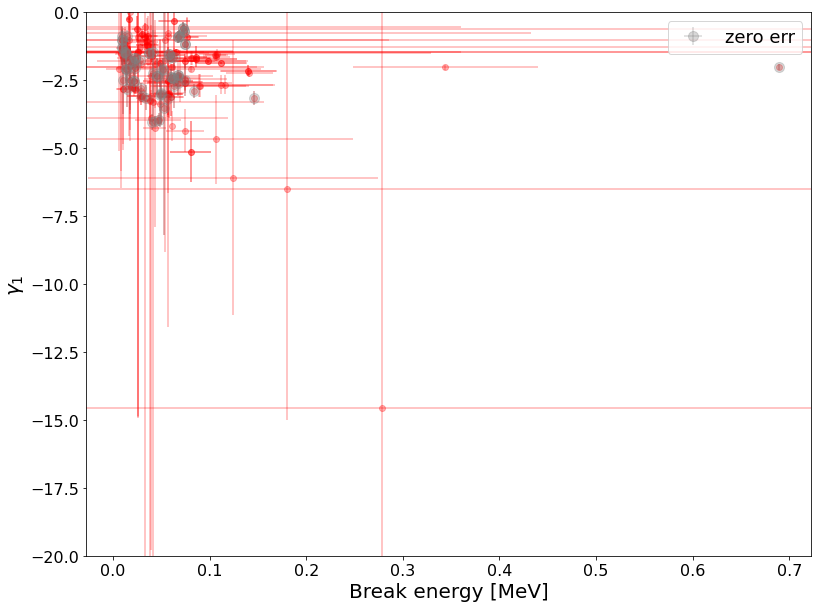

In [15]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['break_point_mev'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.3)#, label='Flux average')

ax.errorbar(df_zero_err.break_point_mev, df_zero_err.gamma1,yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], fmt='o', markersize=10, c='gray', label='zero err', alpha=0.3)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('Break energy [MeV]', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
ax.set_ylim(-20,0)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

In [16]:
#data.query('Senior_Management == True 
 #          and Gender =="Male" and Team =="Marketing" 
  #          and First_Name =="Johnny"', inplace = True)

In [17]:
data.query('type_of_fit == "step_ept_het" and averaging == 5', inplace = True)

In [18]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

In [19]:
data

,Source.Name,Column1,date,averaging_min,direction,data_type,min_e_mev,max_e_mev,distance_au,STEP,...,month,day,time,fit_to,fit_type,data,aver,step,ept,het
7,2020-11-17-0932-all-fit-variables_step_ept_het...,0,2020-11-17,5min,sun,l2,0.004575,1.590048,0.93,True,...,11,17,932,peak,best,l2,5min,step,ept,het
17,2020-11-17-1826-all-fit-variables_step_ept_het...,0,2020-11-17,5min,sun,l2,0.004575,0.191333,0.93,True,...,11,17,1826,peak,best,l2,5min,step,ept,het
28,2020-11-18-1314-all-fit-variables_step_ept_het...,0,2020-11-18,5min,sun,l2,0.004575,0.115216,0.93,True,...,11,18,1314,peak,best,l2,5min,step,ept,het
78,2021-04-17-1617-all-fit-variables_step_ept_het...,0,2021-04-17,5min,sun,l2,0.010028,1.590048,0.84,True,...,4,17,1617,peak,best,l2,5min,step,ept,het
93,2021-05-07-1852-all-fit-variables_step_ept_het...,0,2021-05-07,5min,sun,l2,0.004323,3.793309,0.92,True,...,5,7,1852,peak,best,l2,5min,step,ept,het
108,2021-05-09-1353-all-fit-variables_step_ept_het...,0,2021-05-09,5min,sun,l2,0.004323,1.590048,0.92,True,...,5,9,1852,peak,best,l2,5min,step,ept,het
144,2021-05-22-0648-all-fit-variables_step_ept_het...,0,2021-05-22,5min,sun,l2,0.004323,1.590048,0.95,True,...,5,22,648,peak,best,l2,5min,step,ept,het
168,2021-05-22-2131-all-fit-variables_step_ept_het...,0,2021-05-22,5min,sun,l2,0.011957,1.590048,0.95,True,...,5,22,2131,peak,best,l2,5min,step,ept,het
183,2021-05-23-0434-all-fit-variables_step_ept_het...,0,2021-05-23,5min,sun,l2,0.004575,1.590048,0.95,True,...,5,23,434,peak,best,l2,5min,step,ept,het
204,2021-05-23-1103-all-fit-variables_step_ept_het...,0,2021-05-23,5min,sun,l2,0.014157,1.590048,0.95,True,...,5,23,1103,peak,best,l2,5min,step,ept,het


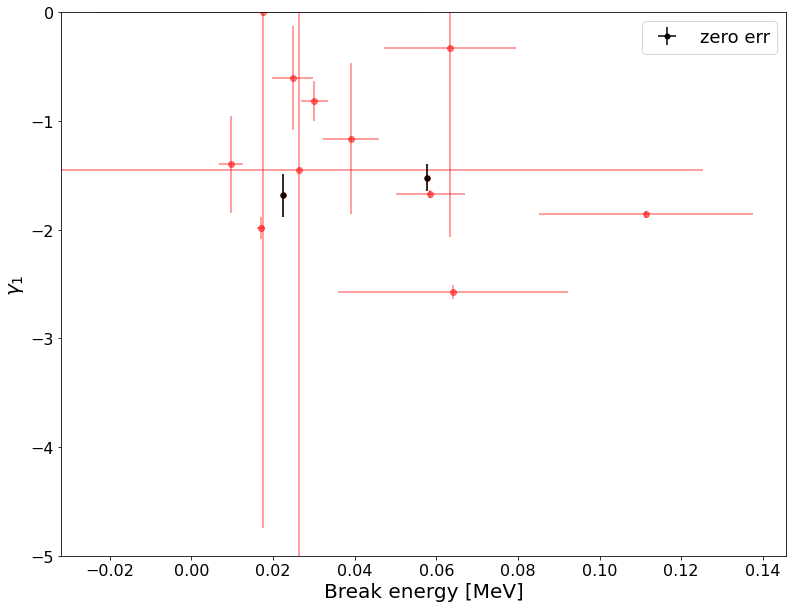

In [21]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['break_point_mev'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.break_point_mev, df_zero_err.gamma1,yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('Break energy [MeV]', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')

ax.set_ylim(-5,0)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

In [22]:
data = pd.concat([fit_run, make_fit], axis=1)

In [25]:
data.query('final_fit_type == "broken" and averaging == 5', inplace = True)

In [26]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

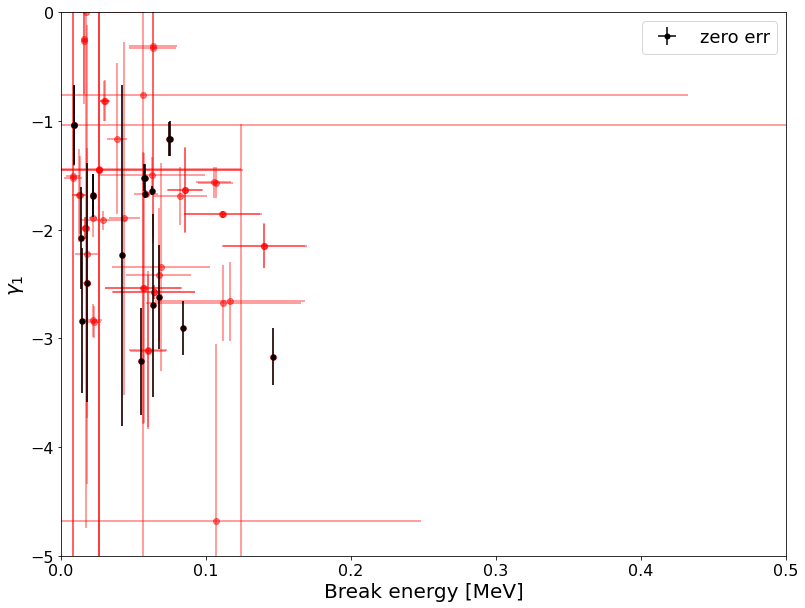

In [29]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['break_point_mev'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.break_point_mev, df_zero_err.gamma1,yerr=data['gamma1_err'], xerr=data['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('Break energy [MeV]', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
ax.set_xlim(0,0.5)
ax.set_ylim(-5,0)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

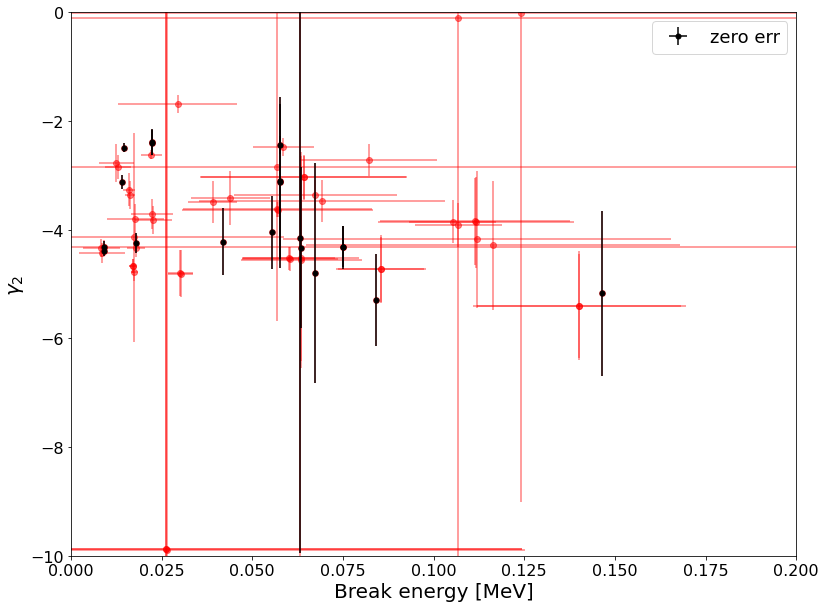

In [34]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['break_point_mev'], y=data['gamma2'], yerr=data['gamma2_err'], xerr=data['break_point_err_mev'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.break_point_mev, df_zero_err.gamma2,yerr=data['gamma2_err'], xerr=data['break_point_err_mev'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('Break energy [MeV]', size=20)
ax.set_ylabel('$\gamma_2$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
ax.set_xlim(0,0.2)
ax.set_ylim(-10,0)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

In [35]:
data = pd.concat([fit_run, make_fit], axis=1)

In [36]:
data.query('averaging == 2', inplace = True)

In [37]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

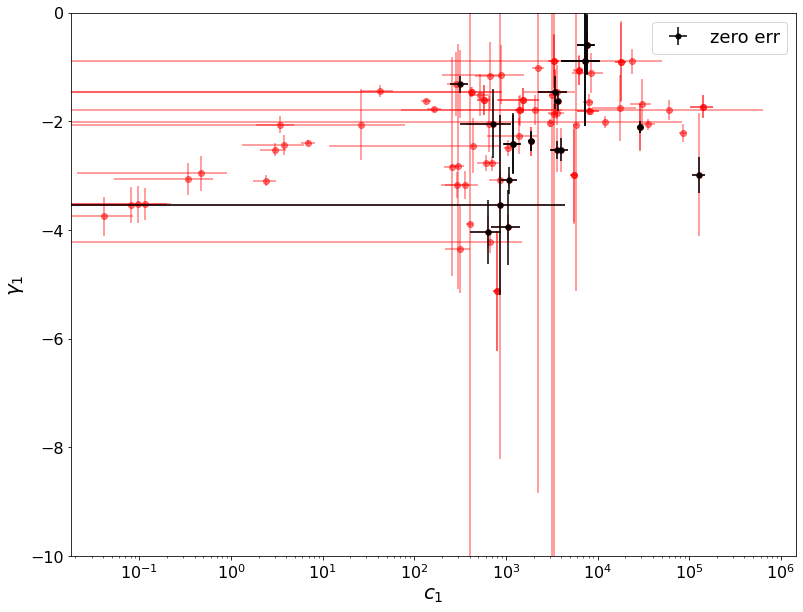

In [39]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma1,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
#ax.set_xlim(-0.2e4,0.15e5)
#ax.set_xlim(0.001,0.15e5)

ax.set_ylim(-10,0)
ax.set_xscale('log')
plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

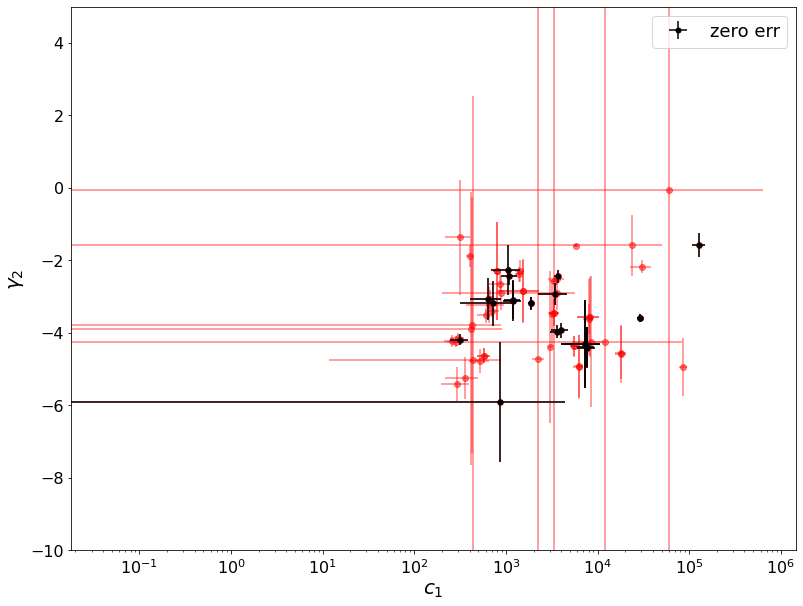

In [40]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma2'], yerr=data['gamma2_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma2,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_2$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
#ax.set_xlim(-0.2e4,0.15e5)
ax.set_ylim(-10,5)
ax.set_xscale('log')
plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

In [41]:
data = pd.concat([fit_run, make_fit], axis=1)

In [42]:
data.query('averaging == 5 and final_fit_type == "broken" and type_of_fit == "ept"' , inplace = True)

In [43]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

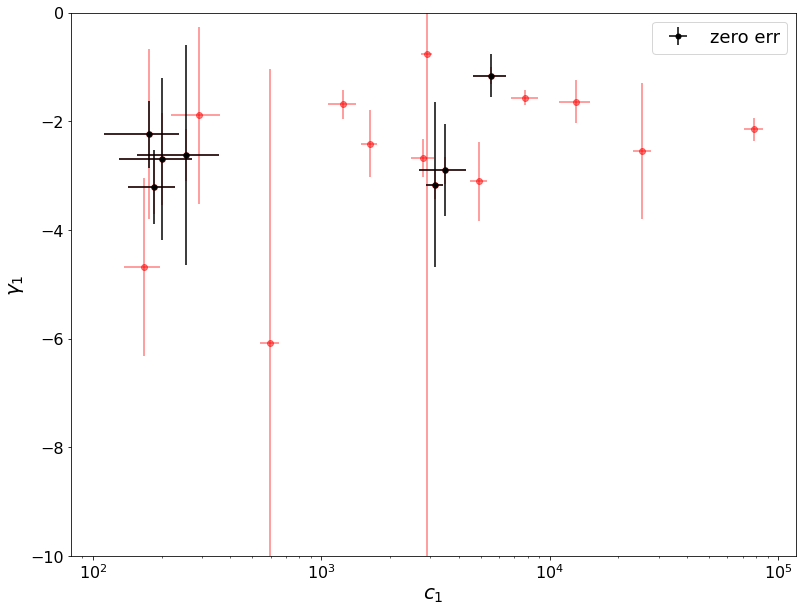

In [45]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma1,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
#ax.set_xlim(-0.2e4,0.15e5)
ax.set_ylim(-10,0)
ax.set_xscale('log')
plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

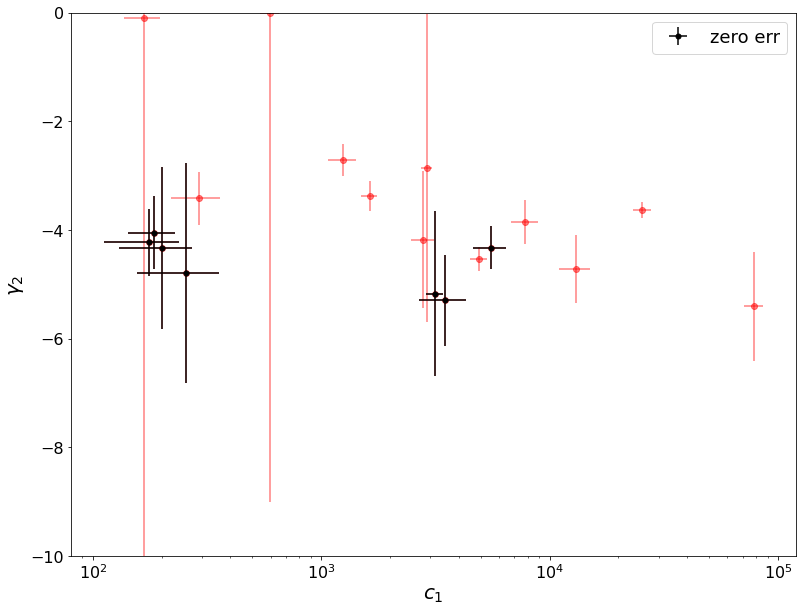

In [46]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma2'], yerr=data['gamma2_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma2,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_2$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
#ax.set_xlim(-0.2e4,0.15e5)
ax.set_ylim(-10,0)
ax.set_xscale('log')
plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

In [47]:
data = pd.concat([fit_run, make_fit], axis=1)

In [48]:
data.query('averaging == 5 and final_fit_type == "single" and type_of_fit == "step_ept_het"  ' , inplace = True)

In [49]:
data['max_e_mev']

28    0.115216
Name: max_e_mev, dtype: float64

In [50]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

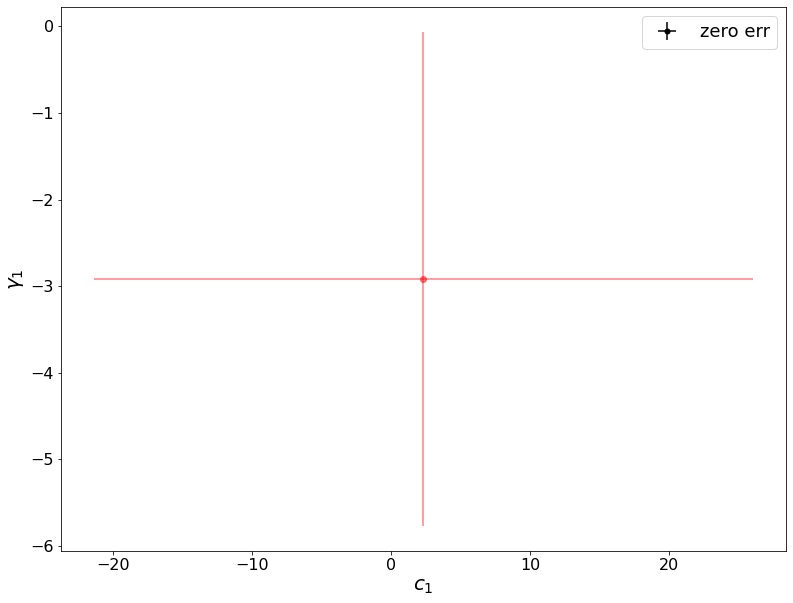

In [51]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma1,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
#ax.set_xlim(-0.2e4,0.15e5)
#ax.set_ylim(-10,5)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

In [52]:
data = pd.concat([fit_run, make_fit], axis=1)

In [53]:
data.query('averaging == 2 and final_fit_type == "broken"' , inplace = True)

In [54]:
df_zero_err = data.where((data['break_point_err_mev'] == 0), np.nan)

C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\Omistaja\Anaconda3\envs\annamaria\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


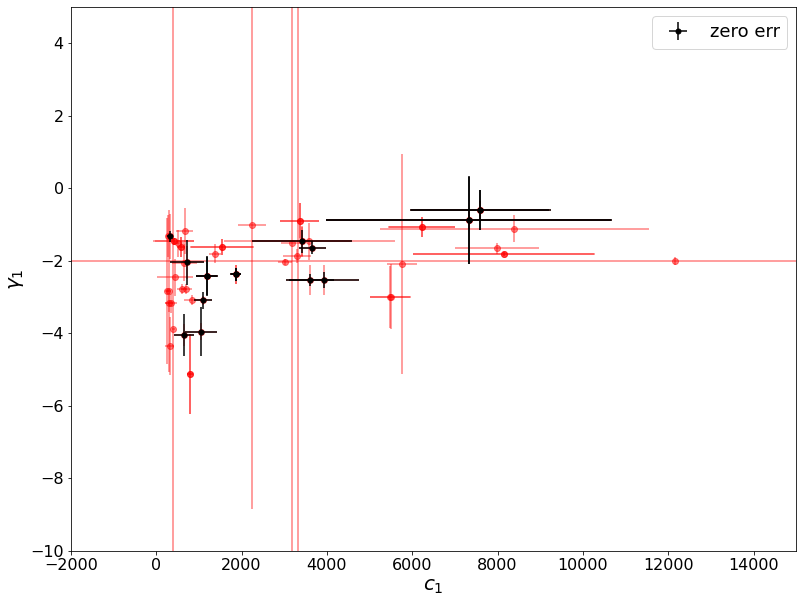

In [55]:
f, ax = plt.subplots(figsize=(13,10)) 
ax.errorbar(x=data['c1'], y=data['gamma1'], yerr=data['gamma1_err'], xerr=data['c1_err'], color='red', fmt='o', ecolor='red', zorder=0, alpha=0.5)#, label='Flux average')

ax.errorbar(df_zero_err.c1, df_zero_err.gamma1,yerr=data['gamma2_err'], xerr=data['c1_err'], fmt='o', markersize=5, c='black', label='zero err', alpha=1)
#ax.plot(df_no_sig.Primary_energy, df_no_sig.Bg_subtracted_average, 'o', c='blue', markersize=11, label='excluded (sigma)')
#ax.plot(df_rel_err.Primary_energy, df_rel_err.Bg_subtracted_average, 'o', c='orange', markersize=6, label='excluded (rel error)')


ax.set_xlabel('$c_1$', size=20)
ax.set_ylabel('$\gamma_1$', size=20)
plt.tick_params(axis='x', which='minor', labelsize=16)
ax.xaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
    #plt.tick_params(axis='y', which='minor')
    #ax.yaxis.set_minor_formatter(FormatStrFormatter("%.0f"))
plt.legend(prop={'size': 18})
plt.xticks(size=16)
plt.yticks(size=16)
#plt.grid()
plt.title('')
ax.set_xlim(-0.2e4,0.15e5)
ax.set_ylim(-10,5)

plt.show()

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['break_point_mev'], data['gamma1'])

#plt.scatter(data['c1'], data['gamma1'])

In [56]:
data = pd.concat([fit_run, make_fit], axis=1)

Text(0.5, 0, '$\\gamma_1$')

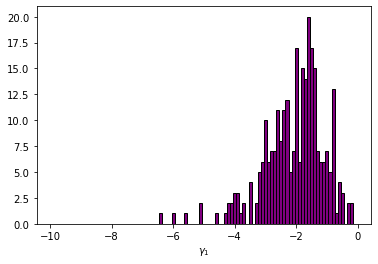

In [61]:
plt.hist(data['gamma1'], bins=np.arange(-10,0,0.1), align='right', color='purple', edgecolor='black')
plt.xlabel('$\gamma_1$')

Text(0.5, 0, '$\\gamma_2$')

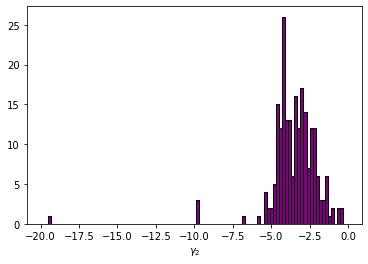

In [63]:
plt.hist(data['gamma2'], bins=np.arange(-20,0,0.2), align='right', color='purple', edgecolor='black')
plt.xlabel('$\gamma_2$')

Text(0.5, 0, 'Break point [MeV]')

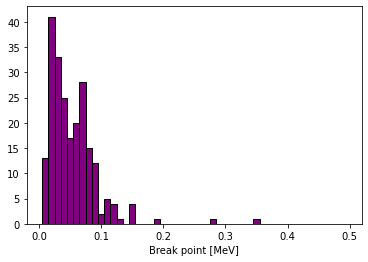

In [64]:
plt.hist(data['break_point_mev'], bins=np.arange(0,0.5,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Break point [MeV]')
#plt.hist(data['break_point_mev'])

Text(0.5, 0, '$c_1$')

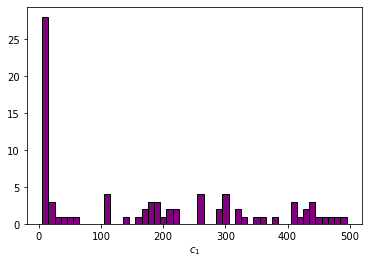

In [65]:
plt.hist(data['c1'], bins=np.arange(0,500,10), align='right', color='purple', edgecolor='black')
plt.xlabel('$c_1$')
#plt.hist(data['break_point_mev'])

Text(0.5, 0, '$\\alpha$')

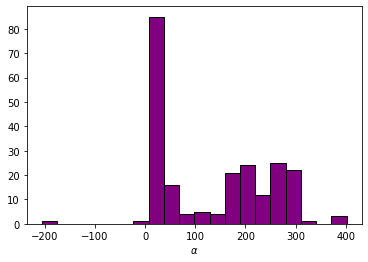

In [67]:
plt.hist(data['alpha'], bins=20, align='right', color='purple', edgecolor='black')
plt.xlabel(r'$\alpha$')

In [68]:
# data = pd.concat([fit_run, make_fit], axis=1)
data.query('averaging == 5 and final_fit_type == "broken" and min_e_mev<0.06 and max_e_mev >0.12' , inplace = True)

Text(0.5, 0, 'Break point [MeV]')

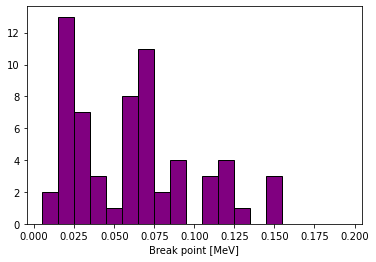

In [69]:
plt.hist(data['break_point_mev'], bins=np.arange(0,0.2,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Break point [MeV]')
#plt.hist(data['break_point_mev'])

In [70]:
data = pd.concat([fit_run, make_fit], axis=1)
data.query('averaging == 2 and final_fit_type == "broken" and type_of_fit == "ept"' , inplace = True)
print(len(data.index))
print(data['break_point_mev'])

12
3      0.080302
56     0.074636
74     0.039791
90     0.278465
104    0.106941
119    0.074675
140    0.076785
164    0.060119
179    0.072937
224    0.058386
254    0.075014
281    0.052045
Name: break_point_mev, dtype: float64


Text(0.5, 0, 'Break point [MeV]')

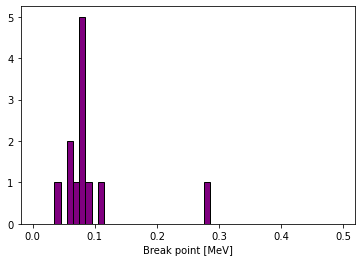

In [71]:
plt.hist(data['break_point_mev'], bins=np.arange(0,0.5,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Break point [MeV]')
#plt.hist(data['break_point_mev'])

In [72]:
data.columns

Index(['Source.Name', 'Column1', 'date', 'averaging_min', 'direction',
       'data_type', 'min_e_mev', 'max_e_mev', 'distance_au', 'STEP', 'EPT',
       'HET', 'sigma', 'relative_error', 'fraction_of_nan',
       'leave_first_het_channel_out', 'shift_step_data', 'type_of_fit',
       'fit_to', 'window', 'which_fit', 'min_energy', 'max_energy',
       'gamma1_guess', 'gamma2_guess', 'c1_guess', 'alpha_guess',
       'break_guess_mev', 'cutoff_point_guess_mev', 'use_random', 'iterations',
       'Source.Name', 'averaging', 'final_fit_type', 'reduced_chi_sq', 'c1',
       'c1_err', 'gamma1', 'gamma1_err', 'gamma2', 'gamma2_err',
       'break_point_mev', 'break_point_err_mev', 'exp_cutoff_point_mev',
       'cutoff_err_mev', 'alpha', 'year', 'month', 'day', 'time', 'fit_to',
       'fit_type', 'data', 'aver', 'step', 'ept', 'het'],
      dtype='object')

In [73]:
data = pd.concat([fit_run, make_fit], axis=1)
data['date'].value_counts()

2021-05-22    57
2021-05-23    36
2021-08-26    30
2020-11-17    25
2020-11-18    20
2021-05-09    16
2021-05-07    15
2021-09-28    15
2021-04-17    14
2021-08-28    12
2020-11-19    10
2021-02-15     9
2021-03-05     9
2021-07-23     9
2021-10-09     6
Name: date, dtype: int64

In [74]:
data = pd.concat([fit_run, make_fit], axis=1)
data.query('averaging == 1 and final_fit_type == "broken" and min_e_mev<0.06 and max_e_mev >0.12' , inplace = True)
print(len(data.index))

47


Text(0.5, 0, 'Break point [MeV]')

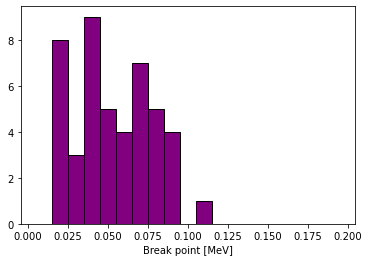

In [75]:
plt.hist(data['break_point_mev'], bins=np.arange(0,0.2,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Break point [MeV]')
#plt.hist(data['break_point_mev'])

In [76]:
data = pd.concat([fit_run, make_fit], axis=1)
data.query('averaging == 5 and final_fit_type == "cut" ' , inplace = True)

In [77]:
data = pd.concat([fit_run, make_fit], axis=1)
data.query('averaging == 5 and final_fit_type == "broken_cut" and min_e_mev<0.06 and max_e_mev >0.12' , inplace = True)

Text(0.5, 0, 'Exp cutoff point [MeV]')

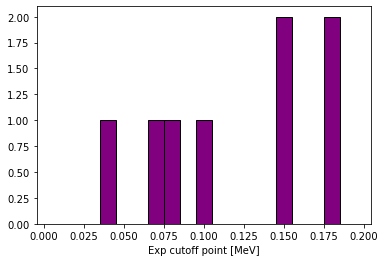

In [78]:
plt.hist(data['exp_cutoff_point_mev'], bins=np.arange(0,0.2,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Exp cutoff point [MeV]')

Text(0.5, 0, 'Break point [MeV]')

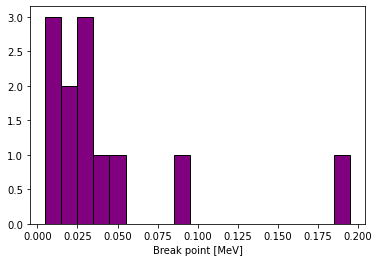

In [79]:
plt.hist(data['break_point_mev'], bins=np.arange(0,0.2,0.01), align='right', color='purple', edgecolor='black')
plt.xlabel('Break point [MeV]')

In [80]:
data = pd.concat([fit_run, make_fit], axis=1)

In [56]:
data['type_of_fit'].value_counts()

ept             78
step_ept        71
step            71
step_ept_het    39
ept_het         33
Name: type_of_fit, dtype: int64

In [57]:
nums = [78,71,71,39,33]
n

NameError: name 'n' is not defined

In [ ]:
data.groupby(['type_of_fit']).sum().plot(kind='pie', y='type_of_fit')

In [ ]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

In [ ]:
labels = 'ept', 'step', 'het', 'step_ept', 'ept_het', 'step_ept_het'
#sizes = [15, 30, 45, 10]
 
colors = ( "orange", "cyan", "brown", 
          "grey") 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0) 
 
ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="best")
plt.show()